# Ecommerce-pricing-analytics

In [1]:
import pandas as pd
import sqlite3


# 1. Load CSVs into Pandas

In [2]:
orders = pd.read_csv("List of Orders.csv", encoding="unicode_escape")
order_details = pd.read_csv("Order Details.csv", encoding="unicode_escape")
sales_target = pd.read_csv("Sales target.csv", encoding="unicode_escape")

In [3]:
print("✅ CSVs Loaded Successfully")
print("Orders:", orders.shape)
print("Order Details:", order_details.shape)
print("Sales Target:", sales_target.shape)

✅ CSVs Loaded Successfully
Orders: (560, 5)
Order Details: (1500, 6)
Sales Target: (36, 3)


# 2. Create SQLite connection


In [4]:
conn = sqlite3.connect("ecommerce.db")  # Creates file ecommerce.db in repo

# 3. Save Pandas DataFrames as SQL Tables


In [5]:
orders.to_sql("orders", conn, if_exists="replace", index=False)
order_details.to_sql("order_details", conn, if_exists="replace", index=False)
sales_target.to_sql("sales_target", conn, if_exists="replace", index=False)

print("✅ Data Saved into SQLite Database")

✅ Data Saved into SQLite Database


# 4. Check the table structure of orders


In [6]:
import pandas as pd

# Show first 5 rows of orders
print("Orders table preview:")
print(pd.read_sql("SELECT * FROM orders LIMIT 5;", conn))


Orders table preview:
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata


# 5. list all columns (with names & types)


In [7]:
# Preview the order_details table
pd.read_sql("PRAGMA table_info(order_details);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Order ID,TEXT,0,None,0
1,1,Amount,REAL,0,None,0
2,2,Profit,REAL,0,None,0
3,3,Quantity,INTEGER,0,None,0
4,4,Category,TEXT,0,None,0
5,5,Sub-Category,TEXT,0,None,0


# ---------------------------
# 6. Top 10 States by Revenue


In [8]:
query = """
SELECT o.State, SUM(od.Amount) AS TotalRevenue
FROM orders o
JOIN order_details od ON o."Order ID" = od."Order ID"
GROUP BY o.State
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 States by Revenue:")
print(result)


Top 10 States by Revenue:
            State  TotalRevenue
0  Madhya Pradesh      105140.0
1     Maharashtra       95348.0
2           Delhi       22531.0
3   Uttar Pradesh       22359.0
4       Rajasthan       21149.0
5         Gujarat       21058.0
6          Punjab       16786.0
7       Karnataka       15058.0
8     West Bengal       14086.0
9         Kerala        13459.0


# ---------------------------
# 7. Top 10 Products by Revenue


In [9]:
query = """
SELECT od."Sub-Category", SUM(od.Amount) AS TotalRevenue
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
print(pd.read_sql(query, conn))


       Sub-Category  TotalRevenue
0          Printers       58252.0
1         Bookcases       56861.0
2             Saree       53511.0
3            Phones       46119.0
4  Electronic Games       39168.0
5            Chairs       34222.0
6          Trousers       30039.0
7            Tables       22614.0
8       Accessories       21728.0
9             Stole       18546.0


# ---------------------------
# 8. Profit by State


In [10]:
query = """
SELECT o.State, SUM(od.Profit) AS TotalProfit
FROM orders o
JOIN order_details od ON o."Order ID" = od."Order ID"
GROUP BY o.State
ORDER BY TotalProfit DESC
LIMIT 10;
"""
print(pd.read_sql(query, conn))


              State  TotalProfit
0       Maharashtra       6176.0
1    Madhya Pradesh       5551.0
2     Uttar Pradesh       3237.0
3             Delhi       2987.0
4       West Bengal       2500.0
5           Kerala        1871.0
6           Haryana       1325.0
7         Rajasthan       1257.0
8  Himachal Pradesh        656.0
9         Karnataka        645.0


# Find Top 10 Categories (or Sub-Categories) by Revenue

In [11]:
query = """
SELECT od."Category", SUM(od.Amount) AS TotalRevenue
FROM order_details od 
GROUP BY od."Category"
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Categories by Revenue:")
print(result)


Top 10 Categories by Revenue:
      Category  TotalRevenue
0  Electronics      165267.0
1     Clothing      139054.0
2    Furniture      127181.0


In [12]:
query = """
SELECT od."Sub-Category", SUM(od.Amount) AS TotalRevenue
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Revenue:")
print(result)


Top 10 Sub-Categories by Revenue:
       Sub-Category  TotalRevenue
0          Printers       58252.0
1         Bookcases       56861.0
2             Saree       53511.0
3            Phones       46119.0
4  Electronic Games       39168.0
5            Chairs       34222.0
6          Trousers       30039.0
7            Tables       22614.0
8       Accessories       21728.0
9             Stole       18546.0


# Profit Analysis – Top 10 Categories/Sub-Categories by Profit

In [13]:
query = """
SELECT od."Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Categories by Profit:")
print(result)


Top 10 Categories by Profit:
      Category  TotalProfit
0     Clothing      11163.0
1  Electronics      10494.0
2    Furniture       2298.0


In [14]:
query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Profit:")
print(result)


Top 10 Sub-Categories by Profit:
  Sub-Category  TotalProfit
0     Printers       5964.0
1    Bookcases       4888.0
2  Accessories       3559.0
3     Trousers       2847.0
4        Stole       2559.0
5       Phones       2207.0
6  Hankerchief       2098.0
7      T-shirt       1500.0
8        Shirt       1131.0
9  Furnishings        844.0


# Quantity Analysis – What sells the most (by units)

In [15]:
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Quantity Sold:")
print(result)


Top 10 Sub-Categories by Quantity Sold:
       Sub-Category  TotalQuantity
0             Saree            782
1       Hankerchief            754
2             Stole            671
3       Furnishings            310
4           T-shirt            305
5            Phones            304
6  Electronic Games            297
7         Bookcases            297
8          Printers            291
9            Chairs            277


# Profitability Ratio (Profit Margin)
Here we check profit relative to sales (Amount)

In [16]:
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit) * 1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Profit Margin:")
print(result)


Top 10 Sub-Categories by Profit Margin:
  Sub-Category  TotalRevenue  TotalProfit  ProfitMargin
0      T-shirt        7382.0       1500.0          0.20
1  Accessories       21728.0       3559.0          0.16
2        Shirt        7555.0       1131.0          0.15
3        Stole       18546.0       2559.0          0.14
4  Hankerchief       14608.0       2098.0          0.14
5        Skirt        1946.0        235.0          0.12
6     Leggings        2106.0        260.0          0.12
7     Printers       58252.0       5964.0          0.10
8     Trousers       30039.0       2847.0          0.09
9    Bookcases       56861.0       4888.0          0.09


# Step 1: Profit Analysis Visualization
Top 10 Sub-Categories by Profit

/tmp/ipykernel_71231/1768134561.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis")


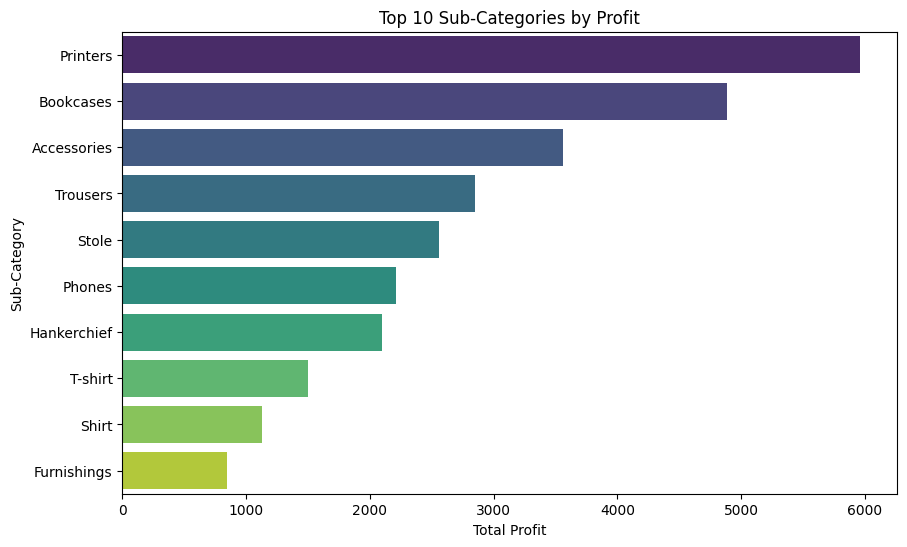

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
df_profit = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis")
plt.title("Top 10 Sub-Categories by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.show()


# Step 2: Quantity Analysis Visualization
Top 10 Sub-Categories by Quantity

/tmp/ipykernel_71231/1869181707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma")


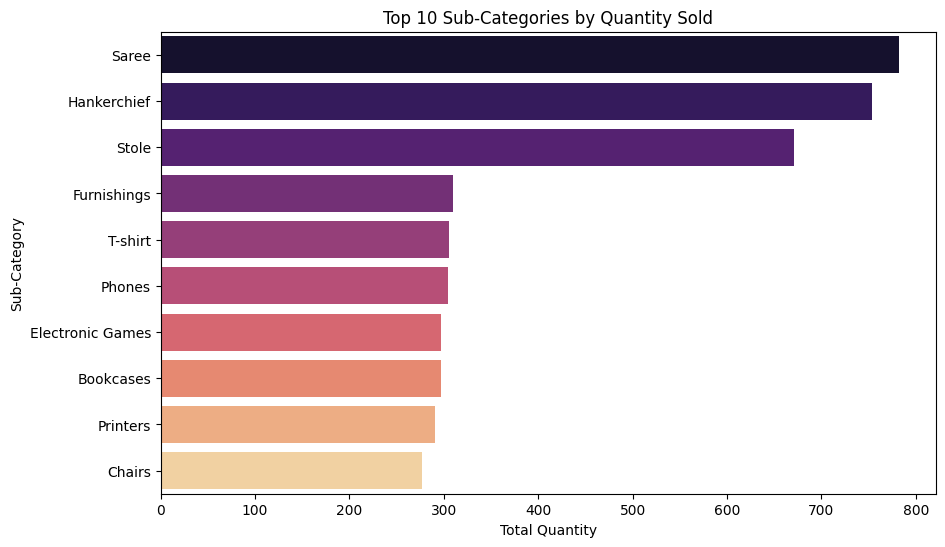

In [18]:
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
df_qty = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma")
plt.title("Top 10 Sub-Categories by Quantity Sold")
plt.xlabel("Total Quantity")
plt.ylabel("Sub-Category")
plt.show()


# Step 3: Profit Margin (Profitability Ratio) Visualization

/tmp/ipykernel_71231/2725374069.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm")


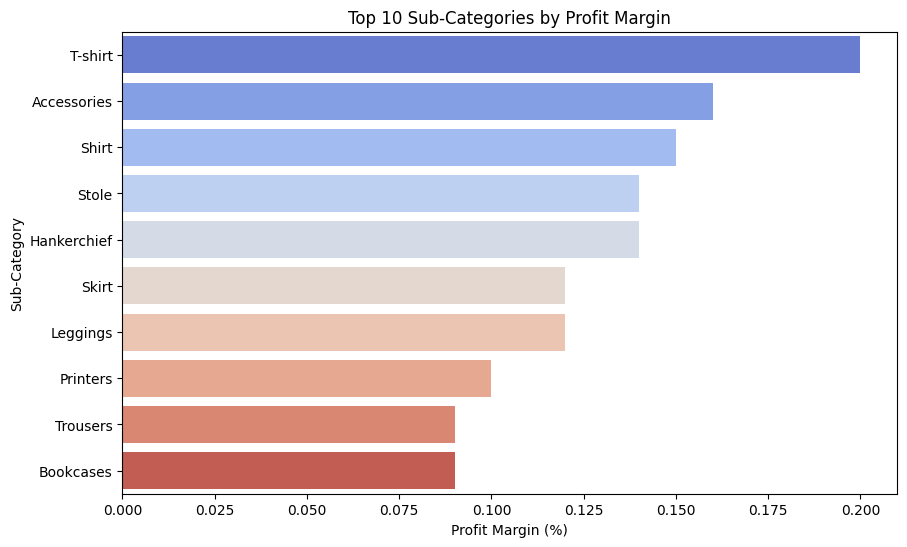

In [19]:
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit) * 1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 10;
"""
df_margin = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm")
plt.title("Top 10 Sub-Categories by Profit Margin")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Sub-Category")
plt.show()


# Use plt.subplots() for Grid Layout

/tmp/ipykernel_71231/2876506745.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis", ax=axes[0])
/tmp/ipykernel_71231/2876506745.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma", ax=axes[1])
/tmp/ipykernel_71231/2876506745.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm", ax=axes[2])


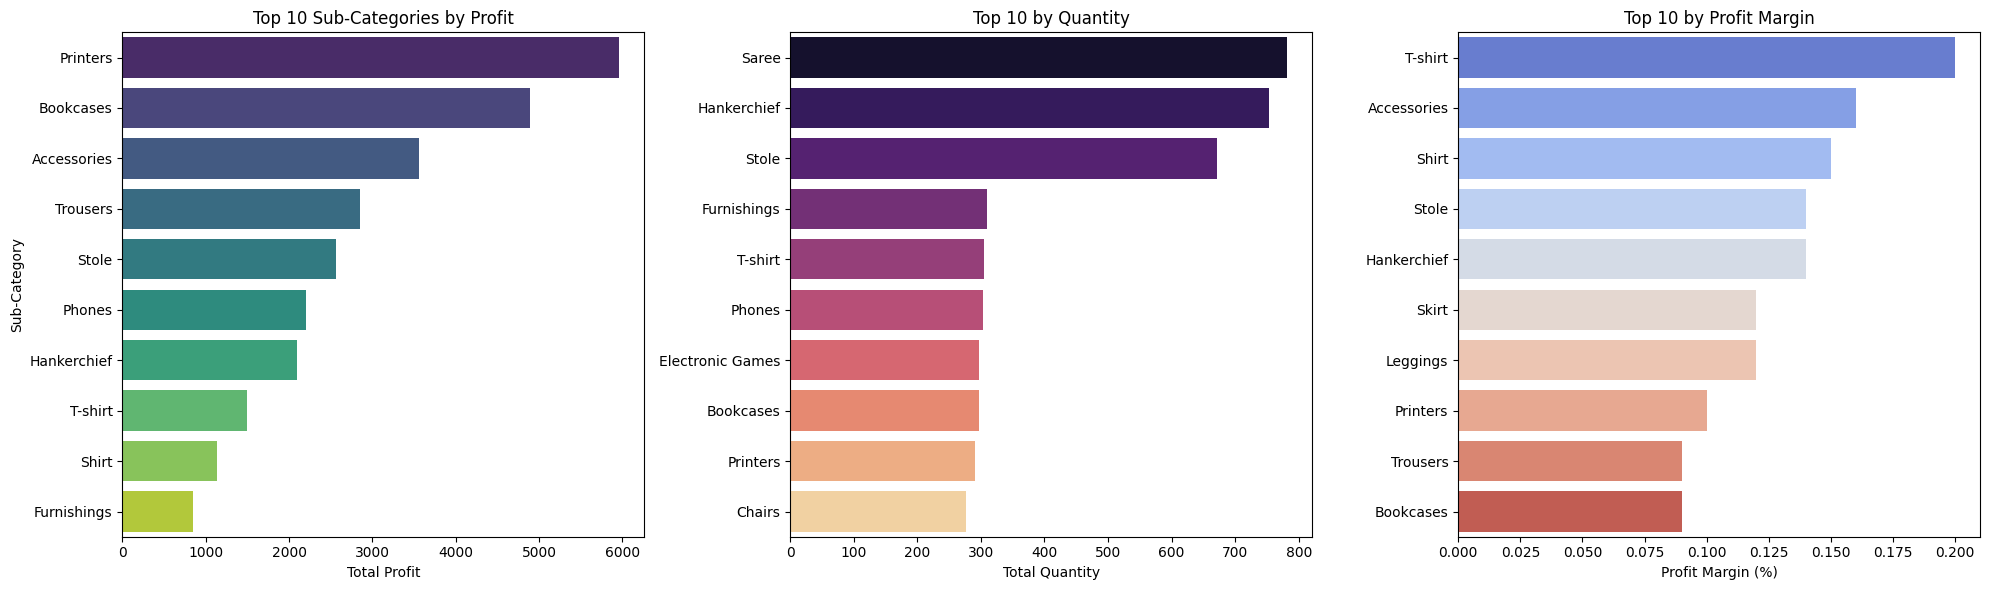

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Create 1 row, 3 columns grid (3 plots side by side)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ---------- 1. Profit Analysis ----------
query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
df_profit = pd.read_sql(query, conn)

sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis", ax=axes[0])
axes[0].set_title("Top 10 Sub-Categories by Profit")
axes[0].set_xlabel("Total Profit")
axes[0].set_ylabel("Sub-Category")

# ---------- 2. Quantity Analysis ----------
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
df_qty = pd.read_sql(query, conn)

sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma", ax=axes[1])
axes[1].set_title("Top 10 by Quantity")
axes[1].set_xlabel("Total Quantity")
axes[1].set_ylabel("")

# ---------- 3. Profit Margin ----------
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit) * 1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 10;
"""
df_margin = pd.read_sql(query, conn)

sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm", ax=axes[2])
axes[2].set_title("Top 10 by Profit Margin")
axes[2].set_xlabel("Profit Margin (%)")
axes[2].set_ylabel("")

# ---------- Adjust Layout ----------
plt.tight_layout()
plt.show()

# Dashboard with 3 Pie Charts

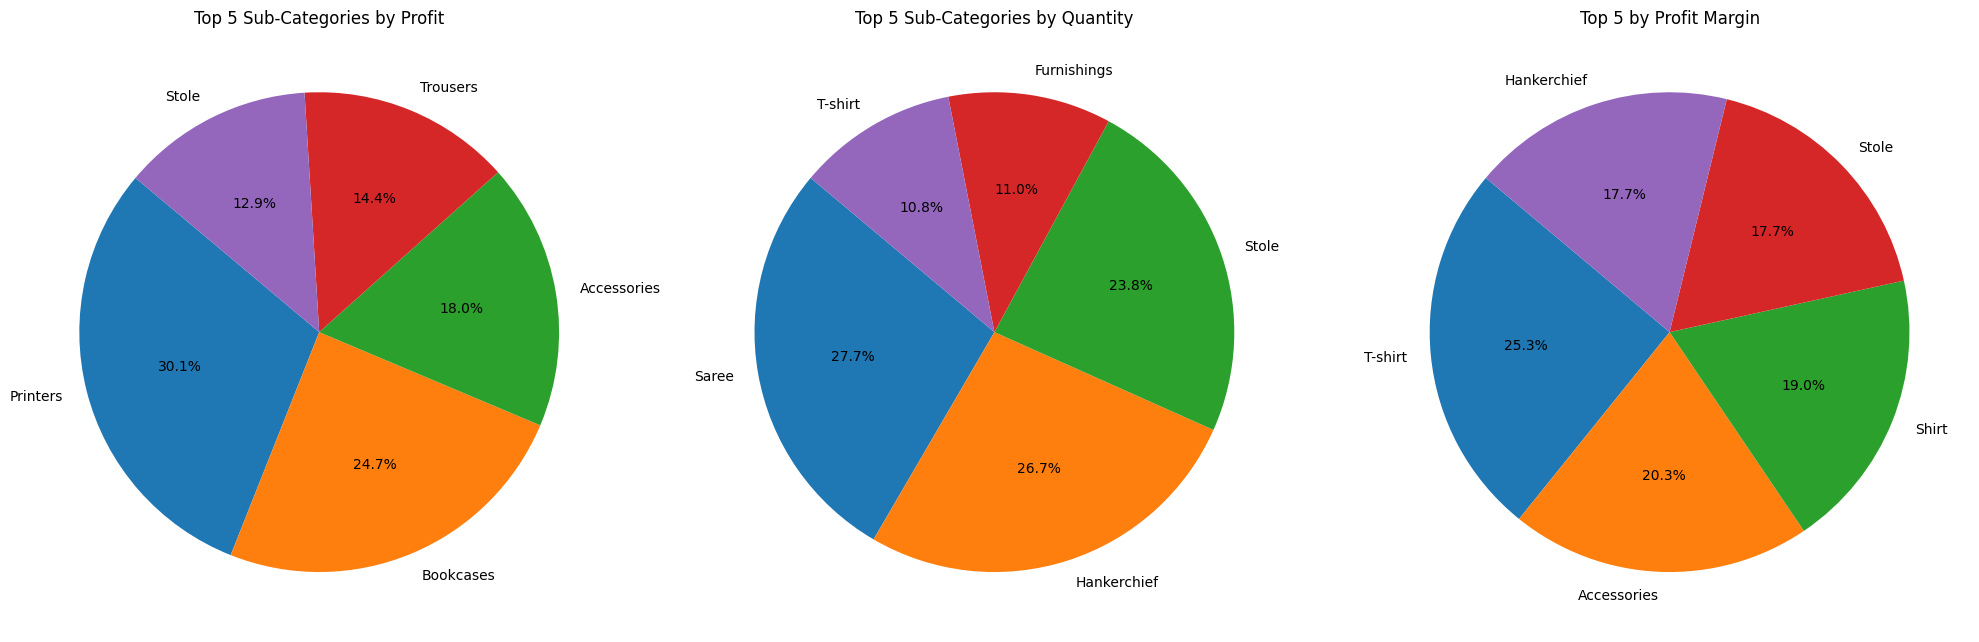

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# ---------- 1. Profit Pie ----------
query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 5;
"""
df_profit = pd.read_sql(query, conn)

axes[0].pie(df_profit["TotalProfit"], labels=df_profit["Sub-Category"], autopct="%1.1f%%", startangle=140)
axes[0].set_title("Top 5 Sub-Categories by Profit")

# ---------- 2. Quantity Pie ----------
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 5;
"""
df_qty = pd.read_sql(query, conn)

axes[1].pie(df_qty["TotalQuantity"], labels=df_qty["Sub-Category"], autopct="%1.1f%%", startangle=140)
axes[1].set_title("Top 5 Sub-Categories by Quantity")

# ---------- 3. Profit Margin Pie ----------
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit)*1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 5;
"""
df_margin = pd.read_sql(query, conn)

axes[2].pie(df_margin["ProfitMargin"], labels=df_margin["Sub-Category"], autopct="%1.1f%%", startangle=140)
axes[2].set_title("Top 5 by Profit Margin")

plt.tight_layout()
plt.show()


# A 2×2 grid dashboard with 4 pie plots

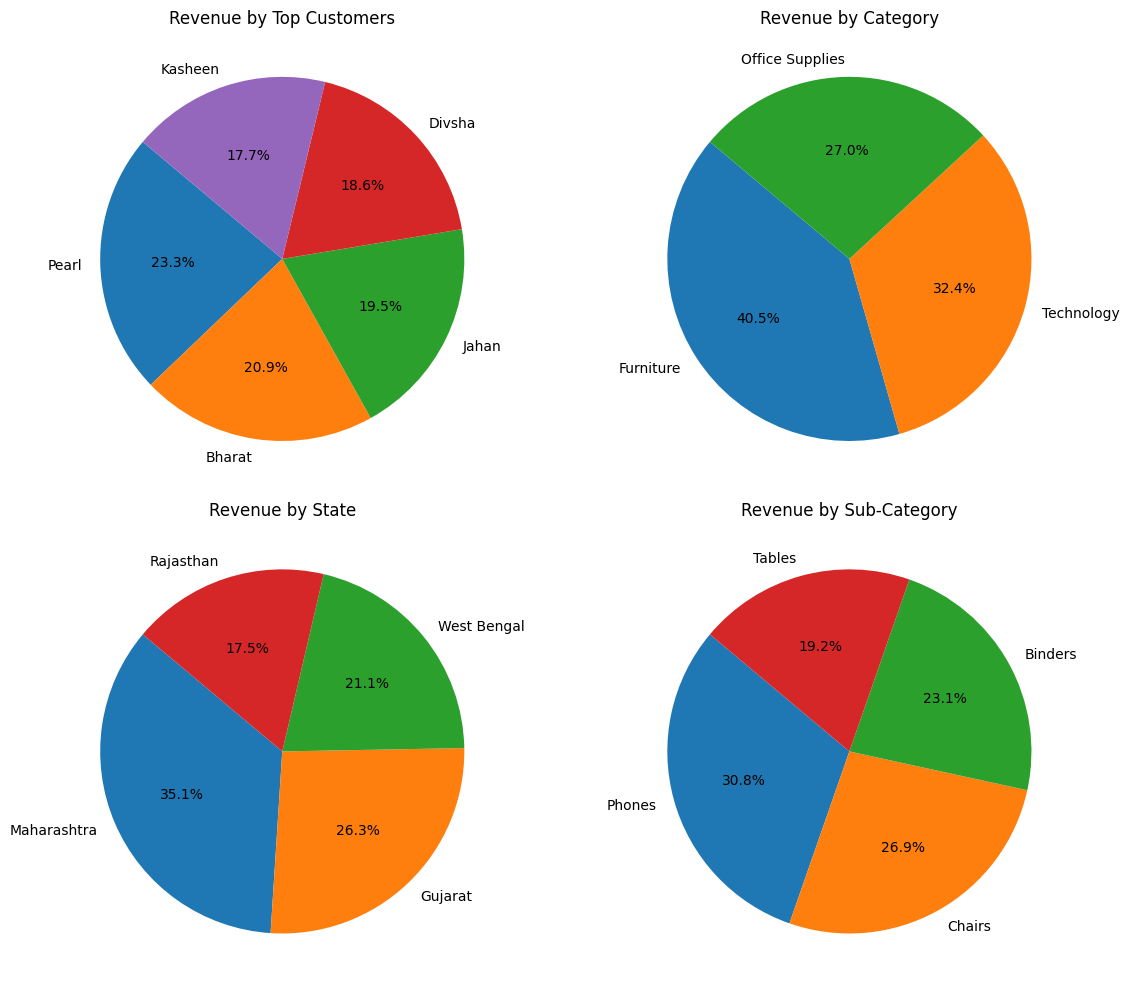

In [22]:
import matplotlib.pyplot as plt

# Example: Assume you already have these DataFrames from SQL queries
# (Replace them with your actual query results)
top_customers = pd.DataFrame({
    'CustomerName': ['Pearl', 'Bharat', 'Jahan', 'Divsha', 'Kasheen'],
    'Revenue': [5000, 4500, 4200, 4000, 3800]
})

top_categories = pd.DataFrame({
    'Category': ['Furniture', 'Technology', 'Office Supplies'],
    'Revenue': [15000, 12000, 10000]
})

top_states = pd.DataFrame({
    'State': ['Maharashtra', 'Gujarat', 'West Bengal', 'Rajasthan'],
    'Revenue': [20000, 15000, 12000, 10000]
})

top_subcategories = pd.DataFrame({
    'Sub-Category': ['Phones', 'Chairs', 'Binders', 'Tables'],
    'Revenue': [8000, 7000, 6000, 5000]
})

# ---------- Dashboard with 4 Pie Plots ----------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pie 1: Revenue by Customer
axes[0,0].pie(top_customers['Revenue'], labels=top_customers['CustomerName'], autopct='%1.1f%%', startangle=140)
axes[0,0].set_title("Revenue by Top Customers")

# Pie 2: Revenue by Category
axes[0,1].pie(top_categories['Revenue'], labels=top_categories['Category'], autopct='%1.1f%%', startangle=140)
axes[0,1].set_title("Revenue by Category")

# Pie 3: Revenue by State
axes[1,0].pie(top_states['Revenue'], labels=top_states['State'], autopct='%1.1f%%', startangle=140)
axes[1,0].set_title("Revenue by State")

# Pie 4: Revenue by Sub-Category
axes[1,1].pie(top_subcategories['Revenue'], labels=top_subcategories['Sub-Category'], autopct='%1.1f%%', startangle=140)
axes[1,1].set_title("Revenue by Sub-Category")

# Adjust layout
plt.tight_layout()
plt.show()


Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for better visualization style
sns.set(style="whitegrid")


Load Your Data

In [24]:
orders = pd.read_csv("List of Orders.csv")
order_details = pd.read_csv("Order Details.csv")
sales_target = pd.read_csv("Sales target.csv")

# Preview first few rows
print("Orders Data:")
display(orders.head())

print("Order Details Data:")
display(order_details.head())

print("Sales Target Data:")
display(sales_target.head())


Orders Data:


,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


Order Details Data:


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


Sales Target Data:


,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


# Plan Dashboard Layout

/tmp/ipykernel_71231/726918218.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Amount", y="Sub-Category", ax=axes[0,1], palette="viridis")


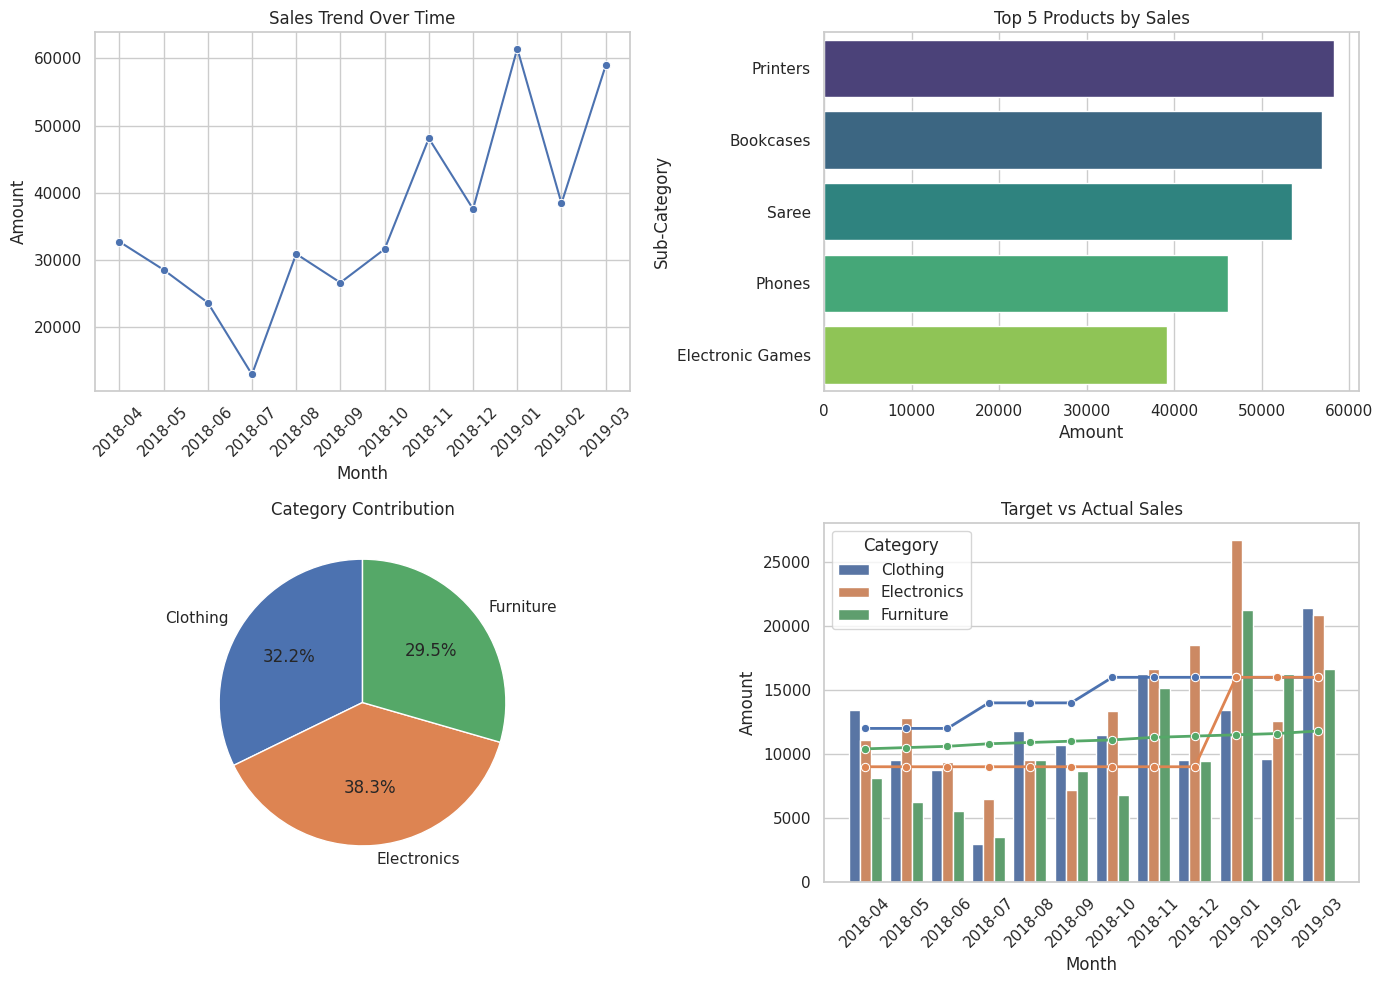

In [25]:

# Merge Orders + Order Details for analysis
df = pd.merge(orders, order_details, on="Order ID")

# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Add Month-Year column
df["Month"] = df["Order Date"].dt.to_period("M").astype(str)

# 1. Sales Trend (Line Chart)
sales_trend = df.groupby("Month")["Amount"].sum().reset_index()

# 2. Top Products (Bar Chart)
top_products = df.groupby("Sub-Category")["Amount"].sum().reset_index().sort_values("Amount", ascending=False).head(5)

# 3. Category Contribution (Pie Chart)
category_share = df.groupby("Category")["Amount"].sum()

# 4. Target vs Actual (Bar Plot)
# Merge sales trend with target data
target_df = sales_target.copy()
target_df["Month"] = pd.to_datetime(target_df["Month of Order Date"], format="%b-%y").dt.to_period("M").astype(str)

actual_sales = df.groupby(["Month","Category"])["Amount"].sum().reset_index()
target_vs_actual = pd.merge(actual_sales, target_df, on=["Month","Category"], how="inner")

# ---------------------- PLOTS ----------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales Trend
sns.lineplot(data=sales_trend, x="Month", y="Amount", marker="o", ax=axes[0,0])
axes[0,0].set_title("Sales Trend Over Time", fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)

# Top Products
sns.barplot(data=top_products, x="Amount", y="Sub-Category", ax=axes[0,1], palette="viridis")
axes[0,1].set_title("Top 5 Products by Sales", fontsize=12)

# Category Contribution
axes[1,0].pie(category_share, labels=category_share.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title("Category Contribution", fontsize=12)

# Target vs Actual
sns.barplot(data=target_vs_actual, x="Month", y="Amount", hue="Category", ax=axes[1,1])
sns.lineplot(data=target_vs_actual, x="Month", y="Target", hue="Category", 
             marker="o", linewidth=2, ax=axes[1,1], legend=False)
axes[1,1].set_title("Target vs Actual Sales", fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Power BI–style polished (Step 5.1)

/tmp/ipykernel_71231/799698601.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Amount", y="Sub-Category",
/tmp/ipykernel_71231/799698601.py:59: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=top_products, x="Amount", y="Sub-Category",


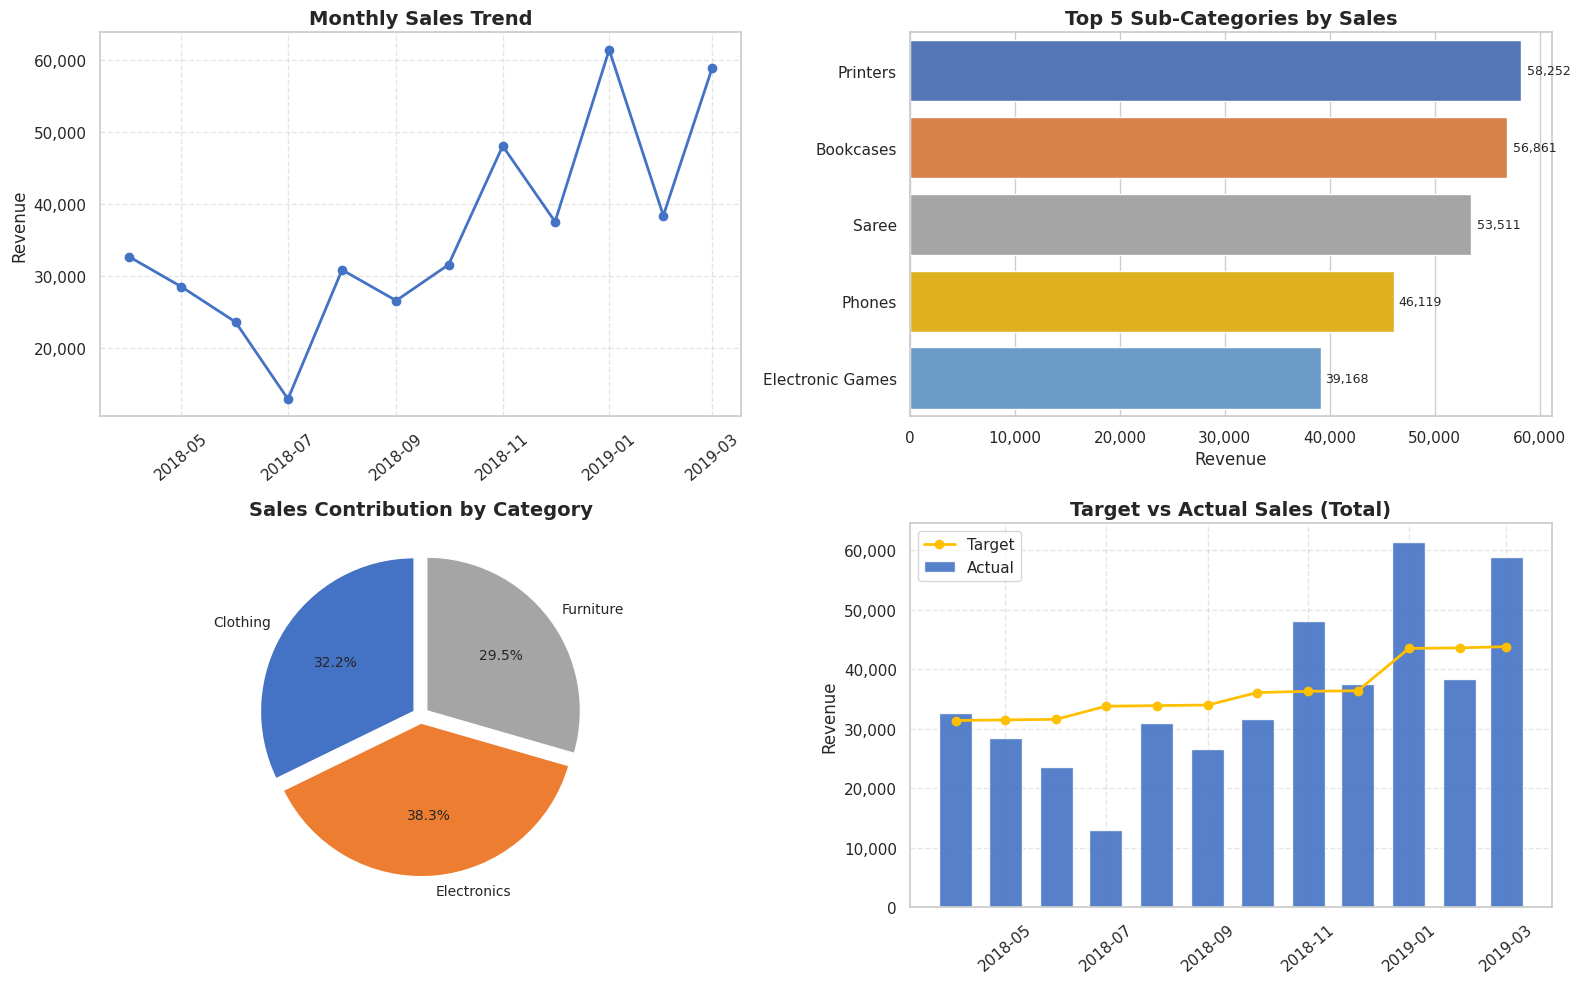

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ---------- Prep ----------
# 1) merge & dates
orders["Order Date"] = pd.to_datetime(orders["Order Date"], dayfirst=True, errors="coerce")
df = pd.merge(orders, order_details, on="Order ID", how="inner")
df["MonthP"] = df["Order Date"].dt.to_period("M")           # Period for safe joins
df["MonthTS"] = df["MonthP"].dt.to_timestamp()              # Timestamp for plotting

# 2) targets: parse "Apr-18" etc.
targets = sales_target.copy()
targets["MonthP"] = pd.to_datetime(targets["Month of Order Date"], format="%b-%y").dt.to_period("M")

# ---------- Aggregates ----------
monthly_sales = (
    df.groupby("MonthP", as_index=False)["Amount"].sum()
    .sort_values("MonthP")
)
monthly_sales["MonthTS"] = monthly_sales["MonthP"].dt.to_timestamp()

top_products = (
    df.groupby("Sub-Category", as_index=False)["Amount"].sum()
      .sort_values("Amount", ascending=False).head(5)
)

category_share = df.groupby("Category", as_index=False)["Amount"].sum()

actual_by_month = (
    df.groupby("MonthP", as_index=False)["Amount"].sum()
)
target_by_month = (
    targets.groupby("MonthP", as_index=False)["Target"].sum()
)
tva = pd.merge(actual_by_month, target_by_month, on="MonthP", how="left")
tva["MonthTS"] = tva["MonthP"].dt.to_timestamp()

# ---------- Styling ----------
sns.set_theme(style="whitegrid")
palette = ["#4472C4", "#ED7D31", "#A5A5A5", "#FFC000", "#5B9BD5", "#70AD47"]

currency = FuncFormatter(lambda x, pos: f"{x:,.0f}")  # 1,234 formatting

# ---------- Plots ----------
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1) Sales Trend
axes[0,0].plot(monthly_sales["MonthTS"], monthly_sales["Amount"],
               marker="o", linewidth=2, color=palette[0])
axes[0,0].set_title("Monthly Sales Trend", fontsize=14, fontweight="bold")
axes[0,0].set_ylabel("Revenue")
axes[0,0].yaxis.set_major_formatter(currency)
axes[0,0].tick_params(axis="x", rotation=40)
axes[0,0].grid(True, linestyle="--", alpha=0.5)

# 2) Top 5 Sub-Categories
sns.barplot(data=top_products, x="Amount", y="Sub-Category",
            ax=axes[0,1], palette=palette)
axes[0,1].set_title("Top 5 Sub-Categories by Sales", fontsize=14, fontweight="bold")
axes[0,1].set_xlabel("Revenue"); axes[0,1].set_ylabel("")
axes[0,1].xaxis.set_major_formatter(currency)
# value labels
for p in axes[0,1].patches:
    w = p.get_width()
    axes[0,1].text(w + (0.01*w if w else 0), p.get_y()+p.get_height()/2,
                   f"{w:,.0f}", va="center", fontsize=9)

# 3) Category Contribution (Pie)
explode = [0.05] * len(category_share)
axes[1,0].pie(category_share["Amount"],
              labels=category_share["Category"],
              autopct=lambda pct: f"{pct:.1f}%",
              startangle=90, explode=explode, colors=palette,
              textprops={"fontsize": 10})
axes[1,0].set_title("Sales Contribution by Category", fontsize=14, fontweight="bold")

# 4) Target vs Actual (Totals per Month)
axes[1,1].bar(tva["MonthTS"], tva["Amount"], width=20, label="Actual", color=palette[0], alpha=0.9)
axes[1,1].plot(tva["MonthTS"], tva["Target"], marker="o", linewidth=2, label="Target", color=palette[3])
axes[1,1].set_title("Target vs Actual Sales (Total)", fontsize=14, fontweight="bold")
axes[1,1].set_ylabel("Revenue")
axes[1,1].yaxis.set_major_formatter(currency)
axes[1,1].tick_params(axis="x", rotation=40)
axes[1,1].legend(loc="upper left")
axes[1,1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# Import plotly
checking its version

In [27]:
import plotly
print(plotly.__version__)


6.3.0


In [29]:
import plotly.graph_objects as go
import plotly.io as pio

def safe_show(fig, filename="figure.png"):
    try:
        fig.show()
    except Exception as e:
        print(f"⚠️ Inline render failed: {e}")
        fig.write_image(filename)
        print(f"✅ Saved fallback image to {filename}")

# Example
fig = go.Figure()
fig.add_bar(x=["A","B","C"], y=[10,20,30])
fig.update_layout(title="Safe Show Test")

safe_show(fig)




In [31]:
import dash
from dash import Dash, dcc, html
import plotly.express as px

app = Dash(__name__)

fig = px.bar(x=["A", "B", "C"], y=[10, 20, 30])

app.layout = html.Div([
    html.H1("E-Commerce Dashboard"),
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, host="0.0.0.0", port=8050)

ModuleNotFoundError: No module named 'dash'

In [ ]:
#import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Column name normalization ---
orders = orders.rename(columns=lambda x: x.strip().lower())  # remove spaces & lowercase
# Try to find amount/sales column
amount_col = None
for candidate in ["amount", "sales", "total", "price"]:
    if candidate in orders.columns:
        amount_col = candidate
        break
if amount_col is None:
    raise KeyError("No valid column found for sales/amount. Expected one of: Amount, Sales, Total, Price")

# Try to find date column
date_col = None
for candidate in ["order date", "date", "order_date"]:
    if candidate in orders.columns:
        date_col = candidate
        break
if date_col is None:
    raise KeyError("No valid column found for order date. Expected one of: Order Date, Date, order_date")

# Convert order date to datetime safely
orders[date_col] = pd.to_datetime(orders[date_col], errors="coerce")
orders = orders.dropna(subset=[date_col])  # drop rows with invalid dates

# --- Create subplots layout ---
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sales Trend Over Time", "Category-wise Sales",
                    "Payment Mode Distribution", "Top 5 Customers")
)

# --- 1. Sales Trend Over Time ---
monthly_sales = orders.groupby(orders[date_col].dt.to_period("M"))[amount_col].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
fig.add_trace(
    go.Scatter(x=monthly_sales.index, y=monthly_sales.values,
               mode="lines+markers", name="Sales", line=dict(color="#636EFA")),
    row=1, col=1
)

# --- 2. Category-wise Sales ---
if "category" in orders.columns:
    category_sales = orders.groupby("category")[amount_col].sum().sort_values(ascending=False)
    fig.add_trace(
        go.Bar(x=category_sales.index, y=category_sales.values, marker_color="#EF553B"),
        row=1, col=2
    )
else:
    fig.add_annotation(text="No 'Category' column found", xref="paper", yref="paper",
                       x=0.75, y=0.9, showarrow=False, row=1, col=2)

# --- 3. Payment Mode Distribution ---
if "payment mode" in orders.columns:
    payment_dist = orders["payment mode"].value_counts()
    fig.add_trace(
        go.Pie(labels=payment_dist.index, values=payment_dist.values),
        row=2, col=1
    )
else:
    fig.add_annotation(text="No 'Payment Mode' column found", xref="paper", yref="paper",
                       x=0.25, y=0.25, showarrow=False, row=2, col=1)

# --- 4. Top 5 Customers ---
if "customer name" in orders.columns:
    top_customers = orders.groupby("customer name")[amount_col].sum().nlargest(5)
    fig.add_trace(
        go.Bar(x=top_customers.values, y=top_customers.index,
               orientation="h", marker_color="#00CC96"),
        row=2, col=2
    )
else:
    fig.add_annotation(text="No 'Customer Name' column found", xref="paper", yref="paper",
                       x=0.75, y=0.25, showarrow=False, row=2, col=2)

# --- Layout ---
fig.update_layout(
    height=800, width=1000,
    title_text="📊 E-commerce Pricing Analytics Dashboard",
    showlegend=False
)

fig.show()


In [ ]:
import re
import plotly.express as px

# Function to find column by keywords
def find_column(columns, keywords):
    for col in columns:
        for key in keywords:
            if re.search(key, col.lower()):
                return col
    return None

# Standardize column names (remove spaces and lowercase for matching)
df.columns = [col.strip() for col in df.columns]

# Detect amount/sales column
amount_col = find_column(df.columns, ["amount", "sales", "total", "price", "revenue", "value"])

if amount_col is None:
    raise KeyError(f"No valid column found for sales/amount. Available columns: {df.columns.tolist()}")

# Detect order date column
date_col = find_column(df.columns, ["date", "order", "time", "day"])

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

# --- Dashboard Example: Sales Over Time ---
if date_col:
    fig = px.line(
        df.groupby(df[date_col].dt.to_period("M"))[amount_col].sum().reset_index(),
        x=date_col, y=amount_col,
        title="Sales Over Time"
    )
    fig.show()
else:
    print("⚠ No date column found, showing total sales instead.")
    print(f"Total {amount_col}: {df[amount_col].sum()}")


In [ ]:
print(df.columns.tolist())

['Order ID', 'Order Date', 'CustomerName', 'State', 'City', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category', 'MonthP', 'MonthTS']


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Robust column detection ---
amount_col = next((c for c in df.columns if c.lower() in ["amount", "sales"]), None)
date_col = next((c for c in df.columns if "date" in c.lower()), None)
customer_col = next((c for c in df.columns if "customer" in c.lower()), None)
category_col = next((c for c in df.columns if "category" in c.lower() and "sub" not in c.lower()), None)
subcat_col = next((c for c in df.columns if "sub" in c.lower()), None)
payment_col = next((c for c in df.columns if "payment" in c.lower()), None)

# Ensure date parsing
if date_col and not np.issubdtype(df[date_col].dtype, np.datetime64):
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

# --- Dashboard layout ---
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sales Trend Over Time", "Category-wise Sales",
                    "Top Sub-Categories", "Top 5 Customers"),
    specs=[[{"type": "xy"}, {"type": "xy"}],   # Row 1 -> line + bar
           [{"type": "domain"}, {"type": "xy"}]]  # Row 2 -> pie + bar
)

# --- 1. Sales Trend ---
if date_col:
    monthly_sales = df.groupby(df[date_col].dt.to_period("M"))[amount_col].sum()
    monthly_sales.index = monthly_sales.index.to_timestamp()
    fig.add_trace(
        go.Scatter(x=monthly_sales.index, y=monthly_sales.values,
                   mode="lines+markers", name="Sales"),
        row=1, col=1
    )

# --- 2. Category-wise Sales ---
if category_col:
    cat_sales = df.groupby(category_col)[amount_col].sum().sort_values(ascending=False)
    fig.add_trace(
        go.Bar(x=cat_sales.index, y=cat_sales.values, name="Category Sales"),
        row=1, col=2
    )

# --- 3. Top Sub-Categories (Pie) ---
if subcat_col:
    sub_sales = df.groupby(subcat_col)[amount_col].sum().sort_values(ascending=False)[:5]
    fig.add_trace(
        go.Pie(labels=sub_sales.index, values=sub_sales.values, name="Top Sub-Categories"),
        row=2, col=1
    )

# --- 4. Top 5 Customers ---
if customer_col:
    top_customers = df.groupby(customer_col)[amount_col].sum().sort_values(ascending=False)[:5]
    fig.add_trace(
        go.Bar(x=top_customers.index, y=top_customers.values, name="Top Customers"),
        row=2, col=2
    )

# Final layout
fig.update_layout(
    title_text="📊 Ecommerce Pricing Analytics Dashboard",
    height=800,
    width=1000
    #showlegend=True
)
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ---------------------------
# Safe column matching function
# ---------------------------
def find_col(possible_names, df_columns):
    for name in df_columns:
        for key in possible_names:
            if key.lower() in name.lower():
                return name
    return None

# ---------------------------
# Identify important columns
# ---------------------------
amount_col   = find_col(["amount", "sales"], df.columns)
profit_col   = find_col(["profit"], df.columns)
quantity_col = find_col(["quantity"], df.columns)
date_col     = find_col(["order date", "date"], df.columns)
state_col    = find_col(["state"], df.columns)
city_col     = find_col(["city"], df.columns)
customer_col = find_col(["customer", "cust"], df.columns)
category_col = find_col(["category"], df.columns)
subcat_col   = find_col(["sub-category", "subcat"], df.columns)

# ---------------------------
# Convert Order Date safely
# ---------------------------
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df["OrderMonth"] = df[date_col].dt.to_period("M").astype(str)

# ---------------------------
# Create subplot grid (with pie support)
# ---------------------------
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sales Over Time", "Top States",
                    "Top Sub-Categories", "Top Customers"),
    specs=[[{"type": "scatter"}, {"type": "bar"}],
           [{"type": "pie"}, {"type": "bar"}]]
)

# 1. Sales Trend
if date_col and amount_col:
    monthly_sales = df.groupby("OrderMonth")[amount_col].sum()
    fig.add_trace(
        go.Scatter(x=monthly_sales.index, y=monthly_sales.values,
                   mode="lines+markers", name="Sales Trend"),
        row=1, col=1
    )

# 2. Top 10 States
if state_col and amount_col:
    top_states = df.groupby(state_col)[amount_col].sum().sort_values(ascending=False).head(10)
    fig.add_trace(
        go.Bar(x=top_states.index, y=top_states.values, name="Top States"),
        row=1, col=2
    )

# 3. Top 5 Sub-Categories (Pie)
if subcat_col and amount_col:
    sub_sales = df.groupby(subcat_col)[amount_col].sum().sort_values(ascending=False).head(5)
    fig.add_trace(
        go.Pie(labels=sub_sales.index, values=sub_sales.values, name="Top Sub-Categories"),
        row=2, col=1
    )

# 4. Top 10 Customers
if customer_col and amount_col:
    top_customers = df.groupby(customer_col)[amount_col].sum().sort_values(ascending=False).head(10)
    fig.add_trace(
        go.Bar(x=top_customers.index, y=top_customers.values, name="Top Customers"),
        row=2, col=2
    )

# ---------------------------
# Layout + Show
# ---------------------------
fig.update_layout(height=800, width=1000,
                  title_text="E-Commerce Analytics Dashboard",
                  showlegend=True)

fig.show()
